In [69]:
#библиотеки
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [92]:
#чтение файла
df = pd.read_csv('Physical_Activity_Monitoring_unlabeled.csv')

In [93]:
print(df.shape)
df.head(20)


(534601, 53)


,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.458720,6.032490,1.006100,7.445750,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.33360,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.761680,8.279720,-5.972500,3.222730,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.77190,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.601800,0.773674,-1.803500,-9.589370,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.30890,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.854430,0.899334,-13.611500,5.915110,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.35660,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.665400,4.398210,0.144153,8.568160,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.99810,10.99500,0.171133,-0.748343,0.252988,-0.588807,6
5,2407.75,32.2500,-11.248600,4.705490,1.472190,-10.437400,4.458190,1.595360,1.376280,1.629110,...,0.395789,-0.734158,-37.2300,-17.66060,25.97660,0.081638,-0.564666,-0.465628,-0.676519,6
6,288.18,33.8125,-9.003480,3.480250,2.202730,-8.781060,3.450250,2.426420,0.291490,-0.142762,...,0.009919,0.016218,-61.3576,-33.90920,-13.77570,0.542814,-0.366369,0.626705,-0.422336,2
7,2926.96,31.8125,-1.183270,4.291570,6.435280,-1.338840,5.228640,7.488770,-0.100648,0.209315,...,0.057945,0.394188,-63.8337,14.46170,14.48690,1.000000,0.000000,0.000000,0.000000,1
8,738.33,34.5625,-8.875780,-5.294850,1.156600,-8.606980,-5.447070,1.569890,-0.276623,-0.353238,...,0.016960,-0.009354,-37.2116,-2.25659,10.92460,0.146531,-0.810946,0.130713,-0.551189,8
9,2934.54,31.7500,-6.033980,6.362040,8.818830,-2.939410,6.993440,8.966410,0.124129,-0.301420,...,0.179439,-1.369650,-60.5519,-36.30930,-1.18247,1.000000,0.000000,0.000000,0.000000,1


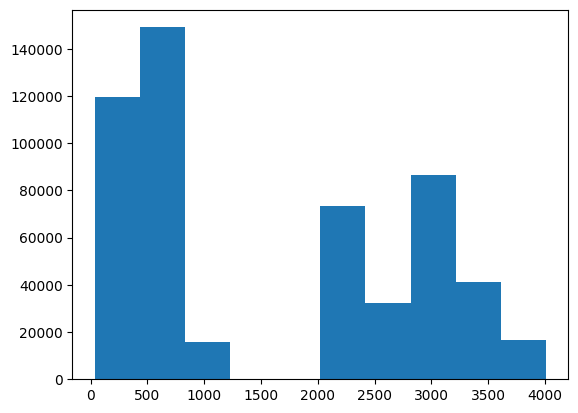

In [94]:
plt.hist(df['timestamp'])
plt.show()

In [95]:
df['Index'] = range(len(df))
df = df.sort_values(by='timestamp')
df = df.sort_values(by = 'subject_id')
df

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id,Index
126217,38.37,30.3750,2.60019,6.42224,6.176870,2.91642,6.17755,5.322920,-0.426031,0.368595,...,-0.012352,-61.3453,-35.6483,-57.8596,1.000000,0.000000,0.000000,0.000000,1,126217
146310,38.41,30.3750,2.05921,6.36713,8.016350,2.28509,6.04819,7.468160,0.474813,0.483767,...,0.042027,-61.1041,-36.6545,-57.5010,1.000000,0.000000,0.000000,0.000000,1,146310
91949,38.42,30.3750,1.77559,7.51033,8.316140,1.91805,6.54984,8.131870,0.608475,0.456743,...,0.035335,-61.2193,-36.6456,-57.8713,1.000000,0.000000,0.000000,0.000000,1,91949
130771,38.44,30.3750,2.18428,9.17175,7.777830,1.89592,8.75544,8.670690,0.422842,0.269654,...,-0.000329,-60.5506,-36.6626,-58.3720,1.000000,0.000000,0.000000,0.000000,1,130771
287861,38.45,30.3750,2.48855,9.38736,6.704020,2.25427,9.35600,7.657260,0.111121,0.198931,...,-0.020684,-60.6535,-37.1051,-58.0046,1.000000,0.000000,0.000000,0.000000,1,287861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411431,68.07,33.8125,-9.53414,-1.61050,1.018850,-9.40838,-1.72654,1.109530,0.035899,-0.002053,...,-0.015240,-35.5797,38.3899,-17.6251,0.551906,0.371471,0.693400,0.276777,8,411431
418217,68.08,33.8125,-9.57540,-1.72470,0.941639,-9.42345,-1.69626,1.079280,-0.002822,-0.007262,...,-0.002769,-35.0726,38.6225,-17.4817,0.551779,0.371654,0.693401,0.276782,8,418217
409593,68.10,33.8125,-9.50143,-1.57419,0.865265,-9.39406,-1.72673,1.018910,0.005568,0.007772,...,0.013892,-35.5836,38.6480,-17.4836,0.551608,0.372035,0.693293,0.276882,8,409593
363063,488.63,34.3125,-1.83510,-9.35207,-0.841056,-1.59064,-9.56221,-0.542382,0.728741,0.016318,...,-0.005815,-18.6761,16.0464,26.0028,0.139844,0.676116,0.394010,0.606685,8,363063


In [96]:
#чистка нулей

print(df['subject_id'].value_counts())

df.bfill(axis=0,inplace= True)
df.isna().sum()

subject_id
5    76793
8    73047
6    70240
1    69882
2    68740
4    63740
7    62115
3    50044
Name: count, dtype: int64


,0
timestamp,0
handTemperature,0
handAcc16_1,0
handAcc16_2,0
handAcc16_3,0
handAcc6_1,0
handAcc6_2,0
handAcc6_3,0
handGyro1,0
handGyro2,0


In [ ]:
#сокращение массива
#df=df2.head(15000)

In [97]:
#сброс лишних столбцов
to_drop = ['timestamp','handAcc6_1','handAcc6_2','handAcc6_3','chestAcc6_1','chestAcc6_2','chestAcc6_3','ankleAcc6_1','ankleAcc6_2','ankleAcc6_3','subject_id']
df.drop(columns=["handOrientation1", "handOrientation2" , "handOrientation3", "handOrientation4", "chestOrientation1", "chestOrientation2" , "chestOrientation3", "chestOrientation4", "ankleOrientation1", "ankleOrientation2" , "ankleOrientation3", "ankleOrientation4", 'handTemperature', "chestTemperature", "ankleTemperature"], inplace=True)
df = df.drop(to_drop, axis = 1)
print(df.isna().sum())

handAcc16_1     0
handAcc16_2     0
handAcc16_3     0
handGyro1       0
handGyro2       0
handGyro3       0
handMagne1      0
handMagne2      0
handMagne3      0
chestAcc16_1    0
chestAcc16_2    0
chestAcc16_3    0
chestGyro1      0
chestGyro2      0
chestGyro3      0
chestMagne1     0
chestMagne2     0
chestMagne3     0
ankleAcc16_1    0
ankleAcc16_2    0
ankleAcc16_3    0
ankleGyro1      0
ankleGyro2      0
ankleGyro3      0
ankleMagne1     0
ankleMagne2     0
ankleMagne3     0
Index           0
dtype: int64


In [98]:
#нахождение векторов
df['handAcc'] = np.sqrt(df['handAcc16_1']**2 + df['handAcc16_2']**2 + df['handAcc16_3']**2)
df = df.drop(['handAcc16_1', 'handAcc16_2', 'handAcc16_3'], axis=1)
df['handGyro'] = np.sqrt(df['handGyro1']**2 + df['handGyro2']**2 + df['handGyro3']**2)
df = df.drop(['handGyro1', 'handGyro2', 'handGyro3'], axis=1)
#df['handOrientation'] = np.sqrt(df['handOrientation1']**2 + df['handOrientation2']**2 + df['handOrientation3']**2)
#df = df.drop(['handOrientation1', 'handOrientation2', 'handOrientation3'], axis=1)
df['handMagne'] = np.sqrt(df['handMagne1']**2 + df['handMagne2']**2 + df['handMagne3']**2)
df = df.drop(['handMagne1', 'handMagne2', 'handMagne3'], axis=1)

df['chestAcc'] = np.sqrt(df['chestAcc16_1']**2 + df['chestAcc16_2']**2 + df['chestAcc16_3']**2)
df = df.drop(['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3'], axis=1)
df['chestGyro'] = np.sqrt(df['chestGyro1']**2 + df['chestGyro2']**2 + df['chestGyro3']**2)
df = df.drop(['chestGyro1', 'chestGyro2', 'chestGyro3'], axis=1)
#df['chestOrientation'] = np.sqrt(df['chestOrientation1']**2 + df['chestOrientation2']**2 + df['chestOrientation3']**2)
#df = df.drop(['chestOrientation1', 'chestOrientation2', 'chestOrientation3'], axis=1)
df['chestMagne'] = np.sqrt(df['chestMagne1']**2 + df['chestMagne2']**2 + df['chestMagne3']**2)
df = df.drop(['chestMagne1', 'chestMagne2', 'chestMagne3'], axis=1)

df['ankleAcc'] = np.sqrt(df['ankleAcc16_1']**2 + df['ankleAcc16_2']**2 + df['ankleAcc16_3']**2)
df = df.drop(['ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3'], axis=1)
df['ankleGyro'] = np.sqrt(df['ankleGyro1']**2 + df['ankleGyro2']**2 + df['ankleGyro3']**2)
df = df.drop(['ankleGyro1', 'ankleGyro2', 'ankleGyro3'], axis=1)
#df['ankleOrientation'] = np.sqrt(df['ankleOrientation1']**2 + df['ankleOrientation2']**2 + df['ankleOrientation3']**2)
#df = df.drop(['ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3'], axis=1)
df['ankleMagne'] = np.sqrt(df['ankleMagne1']**2 + df['ankleMagne2']**2 + df['ankleMagne3']**2)
df = df.drop(['ankleMagne1', 'ankleMagne2', 'ankleMagne3'], axis=1)

print(df.isna().sum())


Index         0
handAcc       0
handGyro      0
handMagne     0
chestAcc      0
chestGyro     0
chestMagne    0
ankleAcc      0
ankleGyro     0
ankleMagne    0
dtype: int64


In [99]:
df_diff = df.diff().fillna(0)
df_diff.columns = [f'{col}_diff' for col in df_diff.columns]
df_energy = df ** 2
df_energy.columns = [f'{col}_energy' for col in df.columns]
df_energy = pd.DataFrame(df_energy)
print(df_energy)
df = pd.concat([df, df_diff, df_energy], axis=1)
df

        Index_energy  handAcc_energy  handGyro_energy  handMagne_energy  \
126217   15930731089       86.159878         0.357293       4961.995375   
146310   21406616100      109.042558         0.481502       5033.059452   
91949     8454618601      128.715961         0.593854       5084.911768   
130771   17101054441      149.386717         0.252210       5041.313238   
287861   82863955321      139.259293         0.055083       5035.332892   
...              ...             ...              ...               ...   
411431  169275467761       94.531591         0.001638       2541.967163   
418217  174905459089       95.549559         0.001019       2589.344752   
409593  167766425649       93.503930         0.000140       2549.278251   
363063  131814741969       91.536180         0.531395        790.785507   
454166  206266755556       76.354487         0.555713        799.065889   

        chestAcc_energy  chestGyro_energy  chestMagne_energy  ankleAcc_energy  \
126217        98.0

,Index,handAcc,handGyro,handMagne,chestAcc,chestGyro,chestMagne,ankleAcc,ankleGyro,ankleMagne,...,Index_energy,handAcc_energy,handGyro_energy,handMagne_energy,chestAcc_energy,chestGyro_energy,chestMagne_energy,ankleAcc_energy,ankleGyro_energy,ankleMagne_energy
126217,126217,9.282235,0.597740,70.441432,9.902299,0.065219,67.494895,9.914828,0.023509,91.552064,...,15930731089,86.159878,0.357293,4961.995375,98.055534,0.004254,4555.560795,98.303815,0.000553,8381.780437
146310,146310,10.442344,0.693904,70.944059,9.781741,0.041938,67.703880,9.903191,0.066505,91.562156,...,21406616100,109.042558,0.481502,5033.059452,95.682464,0.001759,4583.815320,98.073201,0.004423,8383.628408
91949,91949,11.345306,0.770619,71.308567,9.755468,0.034265,67.585272,9.916952,0.044371,91.868330,...,8454618601,128.715961,0.593854,5084.911768,95.169165,0.001174,4567.768970,98.345946,0.001969,8439.790056
130771,130771,12.222386,0.502205,71.002206,9.747290,0.053579,67.663453,9.907046,0.008776,91.748634,...,17101054441,149.386717,0.252210,5041.313238,95.009663,0.002871,4578.342911,98.149555,0.000077,8417.811783
287861,287861,11.800817,0.234698,70.960080,9.912397,0.036765,67.501046,9.708848,0.026695,91.761480,...,82863955321,139.259293,0.055083,5035.332892,98.255615,0.001352,4556.391183,94.261722,0.000713,8420.169129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411431,411431,9.722736,0.040474,50.417925,9.816024,0.031254,47.841144,9.787751,0.019288,55.229916,...,169275467761,94.531591,0.001638,2541.967163,96.354319,0.000977,2288.775026,95.800072,0.000372,3050.343624
418217,418217,9.774945,0.031916,50.885605,9.776092,0.025537,46.919430,9.912301,0.022433,55.021765,...,174905459089,95.549559,0.001019,2589.344752,95.571975,0.000652,2201.432900,98.253706,0.000503,3027.394612
409593,409593,9.669743,0.011825,50.490378,9.738866,0.041501,47.426443,9.857704,0.017799,55.367290,...,167766425649,93.503930,0.000140,2549.278251,94.845514,0.001722,2249.267515,97.174322,0.000317,3065.536762
363063,363063,9.567454,0.728969,28.120909,9.774401,0.013992,26.165412,10.033613,0.008774,35.811022,...,131814741969,91.536180,0.531395,790.785507,95.538915,0.000196,684.628800,100.673384,0.000077,1282.429272


In [100]:
#стандартизация данных
X_train = df.copy()
std = StandardScaler()
X_std = std.fit_transform(X_train)
df = pd.DataFrame(X_std, columns=X_train.columns)
print(df)

           Index   handAcc  handGyro  handMagne  chestAcc  chestGyro  \
0      -0.914188 -0.302405 -0.354928   1.640678 -0.057610  -0.591023   
1      -0.783990 -0.116521 -0.302004   1.677608 -0.093783  -0.630193   
2      -1.136237  0.028160 -0.259784   1.704390 -0.101666  -0.643101   
3      -0.884679  0.168694 -0.407505   1.681880 -0.104120  -0.610606   
4       0.133231  0.101146 -0.554728   1.678785 -0.054581  -0.638895   
...          ...       ...       ...        ...       ...        ...   
534596  0.933938 -0.231824 -0.661619   0.169456 -0.083497  -0.648168   
534597  0.977910 -0.223458 -0.666329   0.203818 -0.095478  -0.657785   
534598  0.922029 -0.240315 -0.677386   0.174779 -0.106647  -0.630927   
534599  0.620524 -0.256705 -0.282706  -1.468812 -0.095985  -0.677209   
534600  1.210852 -0.389591 -0.273629  -1.458022 -0.064881  -0.651920   

        chestMagne  ankleAcc  ankleGyro  ankleMagne  ...  Index_energy  \
0         1.777331 -0.305082  -0.645737    2.645556  ...     

In [101]:
X = df.values
SSE = []
sil = []

In [52]:
#поиск лучшего кол-ва кластеров
for k in range(2, 9):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    sil.append(silhouette_score(X, kmeans.fit_predict(X)))
    print(k, " ", silhouette_score(X, kmeans.fit_predict(X)))
    # plot_silhouette()

fig, ax = plt.subplots(1,2)
ax[0].plot(range(2,9), SSE, marker='s')
ax[1].plot(range(2,9), sil, marker='s')

plt.show()

KeyboardInterrupt: 

In [102]:
n=6

kmeans = KMeans(n_clusters=n)
kmeans.fit(X)
Y_pred = kmeans.labels_
Y_pred

array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

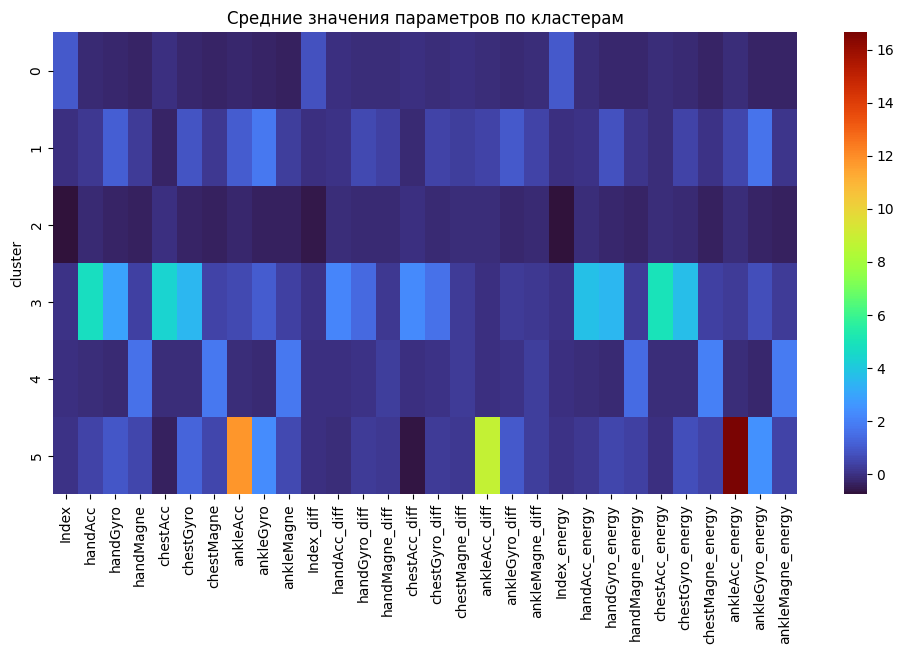

In [103]:
df['cluster'] = Y_pred
cluster_means = df.groupby('cluster').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap='turbo', annot=False)
plt.title('Средние значения параметров по кластерам')
plt.show()

In [104]:
df['cluster'].value_counts()
df

,Index,handAcc,handGyro,handMagne,chestAcc,chestGyro,chestMagne,ankleAcc,ankleGyro,ankleMagne,...,handAcc_energy,handGyro_energy,handMagne_energy,chestAcc_energy,chestGyro_energy,chestMagne_energy,ankleAcc_energy,ankleGyro_energy,ankleMagne_energy,cluster
0,-0.914188,-0.302405,-0.354928,1.640678,-0.057610,-0.591023,1.777331,-0.305082,-0.645737,2.645556,...,-0.146667,-0.343700,1.360818,-0.139813,-0.276318,1.861851,-0.164991,-0.404949,2.898066,4
1,-0.783990,-0.116521,-0.302004,1.677608,-0.093783,-0.630193,1.792295,-0.306603,-0.623708,2.646114,...,-0.103390,-0.334189,1.400097,-0.162010,-0.277638,1.882565,-0.165336,-0.404662,2.898937,4
2,-1.136237,0.028160,-0.259784,1.704390,-0.101666,-0.643101,1.783803,-0.304804,-0.635049,2.663038,...,-0.066182,-0.325586,1.428757,-0.166811,-0.277947,1.870801,-0.164928,-0.404844,2.925421,4
3,-0.884679,0.168694,-0.407505,1.681880,-0.104120,-0.610606,1.789401,-0.306099,-0.653285,2.656422,...,-0.027088,-0.351747,1.404659,-0.168303,-0.277050,1.878553,-0.165222,-0.404984,2.915057,4
4,0.133231,0.101146,-0.554728,1.678785,-0.054581,-0.638895,1.777772,-0.332018,-0.644105,2.657132,...,-0.046242,-0.366842,1.401353,-0.137942,-0.277853,1.862460,-0.171044,-0.404937,2.916169,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,0.933938,-0.231824,-0.661619,0.169456,-0.083497,-0.648168,0.370069,-0.321700,-0.647900,0.637800,...,-0.130834,-0.370934,0.023217,-0.155726,-0.278051,0.199973,-0.168740,-0.404962,0.383912,0
534597,0.977910,-0.223458,-0.666329,0.203818,-0.095478,-0.657785,0.304072,-0.305412,-0.646288,0.626294,...,-0.128909,-0.370982,0.049403,-0.163043,-0.278223,0.135939,-0.165066,-0.404953,0.373090,0
534598,0.922029,-0.240315,-0.677386,0.174779,-0.106647,-0.630927,0.340376,-0.312552,-0.648663,0.645394,...,-0.132777,-0.371049,0.027258,-0.169839,-0.277657,0.171009,-0.166682,-0.404967,0.391077,0
534599,0.620524,-0.256705,-0.282706,-1.468812,-0.095985,-0.677209,-1.181972,-0.289548,-0.653287,-0.435606,...,-0.136499,-0.330369,-0.944699,-0.163353,-0.278464,-0.976095,-0.161442,-0.404984,-0.449786,0


In [105]:
df = df.sort_values(by='Index')

In [106]:
df['activityID'] = df['cluster']
df['activityID'] = df['activityID'].sort_values().reset_index(drop=True)
print(df['activityID'])


284864    2
103878    0
532399    4
77977     0
350806    2
         ..
262670    2
305186    2
300057    2
368840    2
243989    2
Name: activityID, Length: 534601, dtype: int32


In [107]:
df['activityID'].unique()

array([2, 0, 4, 1, 3, 5], dtype=int32)

In [108]:
df['Index'] = range(len(df))
sub_df = df[['Index', 'activityID']]

In [109]:
df['activityID'].unique()

array([2, 0, 4, 1, 3, 5], dtype=int32)

In [110]:
for index, row in sub_df.iterrows():
    if row['activityID'] == 2:
        sub_df.loc[index, 'activityID'] = 1
    if row['activityID'] == 0:
        sub_df.loc[index, 'activityID'] = 2
    if row['activityID'] == 4:
        sub_df.loc[index, 'activityID'] = 3
    if row['activityID'] == 1:
        sub_df.loc[index, 'activityID'] = 4
    if row['activityID'] == 3:
        sub_df.loc[index, 'activityID'] = 5
    if row['activityID'] == 5:
        sub_df.loc[index, 'activityID'] = 6

In [112]:
sub_df

,Index,activityID
284864,0,1
103878,1,2
532399,2,3
77977,3,2
350806,4,1
...,...,...
262670,534596,1
305186,534597,1
300057,534598,1
368840,534599,1


In [113]:
sub_df.to_csv("sub.csv", index=False)
sub_df


,Index,activityID
284864,0,1
103878,1,2
532399,2,3
77977,3,2
350806,4,1
...,...,...
262670,534596,1
305186,534597,1
300057,534598,1
368840,534599,1
